<h1> Quiz 1 Pemahaman tentang Model Selection</h1>

Jelaskan dengan bahasa kalian sendiri

1. Apa itu Bias dan Variance?
2. Apa itu Overfitting dan Underfitting?
3. Apa yang bisa kita lakukan untuk mengatur kompleksitas dari model?
4. Bagaimana model yang baik?
5. Kapan kira2 kita menggunakan GridSearchcv dan kapan menggunakan RandomizedSearchCV?

<h1> Quiz 2 Praktis Model Selection</h1>

1. Bagi kedua data ini menjadi data training dan data test dengan test_size=0.25.
2. Gunakan algoritma KNN sebagai model classifier.
3. Gunakan fungsi GridSearchCV untuk hyperparameter tuning dan model selection.
4. jumlah fold bebas!, gunakan scoring 'roc_auc'
5. Definisikan kombinasi hyperparameter untuk model selection dengan GridSearchCV. kombinasi Hyperparameter bebas, baca lagi dokumentasi KNN di link berikut https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html untuk memahami lagi jenis2 hyperparameter di algorithma KNN.
6. Latih model terhadap data training.
7. Apa hyperparameter terbaik untuk kombinasi hyperparameter kalian?
8. Berapa score validasi terbaik dari model tersebut?
9. Prediksi probabilitasi output dari model yang telah di buat terhadap data test. note : gunakan method .predict_proba() untuk menghasilkan output probabilitas
10. Perhatikan bahwa hasil prediksi ada 2, dimana masing2 adalah nilai probabilitas untuk setiap class label. Ambil nilai probabilitas pasien phositive meninggal dalam waktu kurang dari 5 tahun. note : gunakan bantuan attirubte .classes_ untuk mengetahui urutan label dari hasil prediksi probabilitas.
11. Berapa nilai score roc_auc untuk data test?
12. Apakah model anda termasuk baik atau overtting atau underfitting?
13. Ulangi tahap di atas namun kali ini menggunakan algoritma DecisionTreeClassifier dan kalian bisa menggunakan RandomizedSearchCV apabila process training lama. pelajari algoritma DecisionTreeClassifier di linkberikut : https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html?highlight=decisiontreeclassifier#sklearn.tree.DecisionTreeClassifier
14. Bandingkan scorenya dengan Algoritma KNN, mana yang lebih baik?

Note : Data Science adalah experiment, sangat di dimungkinkan memerlukan beberapa kali percobaan untuk mendapatkan hasil yang terbaik! Happy Coding :)

In [1]:
import pandas as pd

url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/haberman.csv'
list_cols = ['Age', "Patient's Years", "N_positive_ax", "survival_status"]
df = pd.read_csv(url, names=list_cols)

In [2]:
df.head()

,Age,Patient's Years,N_positive_ax,survival_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [30]:
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt
import seaborn as sns

In [4]:
df['survival_status'].value_counts()

1    225
2     81
Name: survival_status, dtype: int64

In [5]:
df['survival_status']

0      1
1      1
2      1
3      1
4      1
      ..
301    1
302    1
303    1
304    2
305    2
Name: survival_status, Length: 306, dtype: int64

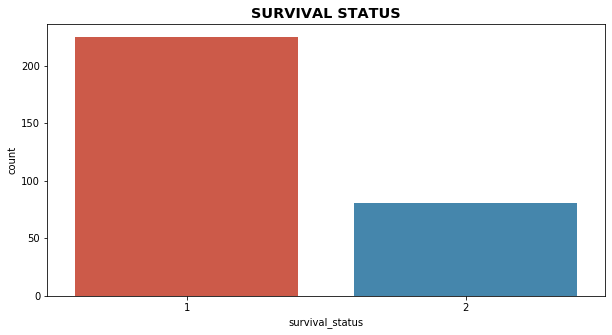

In [6]:
fig, ax = plt.subplots(figsize=[10,5])
plt.style.use('ggplot')
sns.countplot(df['survival_status'])
ax.set_title('SURVIVAL STATUS', fontweight='bold')
plt.show()

In [7]:
dfsatu  = df[df['survival_status'] == 1]
dfdua   = df[df['survival_status'] == 2]

dfsatu  = dfsatu[:len(dfdua)]

In [8]:
len(dfsatu)

81

In [9]:
df  = pd.concat([dfsatu,dfdua])

In [10]:
df['survival_status'].value_counts()

2    81
1    81
Name: survival_status, dtype: int64

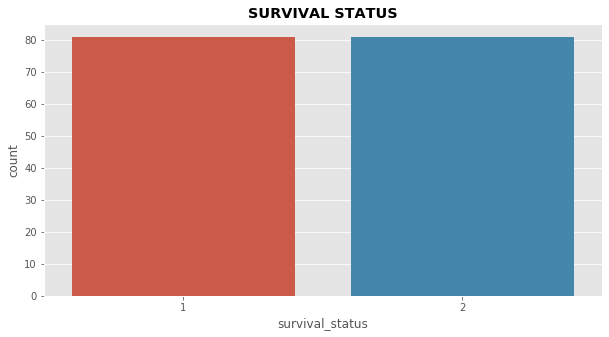

In [11]:
fig, ax = plt.subplots(figsize=[10,5])
plt.style.use('ggplot')
sns.countplot(df['survival_status'])
ax.set_title('SURVIVAL STATUS', fontweight='bold')
plt.show()

In [12]:
y = df['survival_status']
X = df.drop('survival_status', axis=1)

In [13]:
X.columns

Index(['Age', 'Patient's Years', 'N_positive_ax'], dtype='object')

In [14]:
for i in X.columns:
    X[i] = StandardScaler().fit_transform(X[[i]])

In [15]:
X_train, X_test, y_train, y_test    = train_test_split(X, y, test_size=0.25, stratify=y)

knn = KNeighborsClassifier()
dt  = DecisionTreeClassifier()

knn.fit(X_train, y_train)
dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [16]:
print(f"Rata2 CV KNN\t: {cross_val_score(knn, X, y, scoring='roc_auc', cv=10).mean()}\n\n")
print(f"Rata2 CV DT\t: {cross_val_score(dt, X, y, scoring='roc_auc', cv=10).mean()}")

Rata2 CV KNN	: 0.8745659722222221


Rata2 CV DT	: 0.6439236111111111


In [17]:
print('Classification Report dari KNN')
print(classification_report(y_test, knn.predict(X_test)))
print('\n\nClassification Report dari DT')
print(classification_report(y_test, dt.predict(X_test)))

Classification Report dari KNN
              precision    recall  f1-score   support

           1       0.75      0.90      0.82        20
           2       0.88      0.71      0.79        21

    accuracy                           0.80        41
   macro avg       0.82      0.81      0.80        41
weighted avg       0.82      0.80      0.80        41



Classification Report dari DT
              precision    recall  f1-score   support

           1       0.77      0.85      0.81        20
           2       0.84      0.76      0.80        21

    accuracy                           0.80        41
   macro avg       0.81      0.81      0.80        41
weighted avg       0.81      0.80      0.80        41



In [18]:
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [19]:
knnparam    = {'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                'leaf_size': [10, 20, 30, 40, 50],                        
                'n_neighbors': [2, 3, 5, 6, 10],
                'p': [1, 2],
                'weights': ['uniform', 'distance']}

In [20]:
dt.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': None,
 'splitter': 'best'}

In [21]:
dtparam     = {'ccp_alpha': [0.5, 0.1, 0.0, 0.1, 0.5],
                'class_weight': [None, 'balanced'],
                'criterion': ['gini',' entropy'],
                'max_depth': [None, 1, 10, 20, 50],
                'max_features': [None],
                'max_leaf_nodes': [None, 1, 2, 3, 4],
                'min_impurity_decrease': [0.0],                
                'min_samples_leaf': [1, 2, 3, 4],
                'min_samples_split': [2, 3, 4, 5, 6],
                'min_weight_fraction_leaf': [0.5, 0.1, 0.0, 0.1, 0.5],    
                'random_state': [None, 46, 48],
                'splitter': ['best', 'random']}

In [22]:
knntune = GridSearchCV(KNeighborsClassifier(), param_grid=knnparam, error_score='raise', cv=10, scoring='roc_auc')
knntune.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [10, 20, 30, 40, 50],
                         'n_neighbors': [2, 3, 5, 6, 10], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=0)

In [23]:
dttune  = RandomizedSearchCV(DecisionTreeClassifier(), param_distributions=dtparam, n_iter=10, scoring='roc_auc', cv=10)
dttune.fit(X_train, y_train)

RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort='deprecated',
                                                    random_state=None,
         

In [24]:
print(f"Rata2 CV KNN\t: {cross_val_score(knntune, X, y, scoring='roc_auc', cv=10).mean()}\n\n")
print(f"Rata2 CV DT\t: {cross_val_score(dttune, X, y, scoring='roc_auc', cv=10).mean()}")

Rata2 CV KNN	: 0.9019097222222221


Rata2 CV DT	: 0.7125


In [25]:
print('Classification Report dari KNN')
print(classification_report(y_test, knntune.predict(X_test)))
print('\n\nClassification Report dari DT')
print(classification_report(y_test, dttune.predict(X_test)))

Classification Report dari KNN
              precision    recall  f1-score   support

           1       0.78      0.90      0.84        20
           2       0.89      0.76      0.82        21

    accuracy                           0.83        41
   macro avg       0.84      0.83      0.83        41
weighted avg       0.84      0.83      0.83        41



Classification Report dari DT
              precision    recall  f1-score   support

           1       0.79      0.95      0.86        20
           2       0.94      0.76      0.84        21

    accuracy                           0.85        41
   macro avg       0.87      0.86      0.85        41
weighted avg       0.87      0.85      0.85        41



In [28]:
print(knntune.best_params_)

{'algorithm': 'brute', 'leaf_size': 10, 'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}


In [29]:
print(dttune.best_params_)

{'splitter': 'best', 'random_state': 46, 'min_weight_fraction_leaf': 0.0, 'min_samples_split': 3, 'min_samples_leaf': 1, 'min_impurity_decrease': 0.0, 'max_leaf_nodes': 3, 'max_features': None, 'max_depth': 10, 'criterion': 'gini', 'class_weight': None, 'ccp_alpha': 0.0}


In [31]:
#Akurasi knn tuning
print(accuracy_score(y_test, knntune.predict(X_test)))

0.8292682926829268


In [32]:
#Akurasi dt tuning
print(accuracy_score(y_test, dttune.predict(X_test)))

0.8536585365853658


In [83]:
#no 9 proba knn tuning
print(knntune.predict_proba(X_test))

[[0.  1. ]
 [0.  1. ]
 [0.  1. ]
 [0.8 0.2]
 [0.2 0.8]
 [0.8 0.2]
 [0.  1. ]
 [0.4 0.6]
 [0.8 0.2]
 [0.6 0.4]
 [0.  1. ]
 [0.6 0.4]
 [0.2 0.8]
 [0.2 0.8]
 [0.8 0.2]
 [0.8 0.2]
 [1.  0. ]
 [0.8 0.2]
 [0.6 0.4]
 [1.  0. ]
 [0.  1. ]
 [1.  0. ]
 [0.8 0.2]
 [0.8 0.2]
 [0.  1. ]
 [0.4 0.6]
 [0.4 0.6]
 [0.8 0.2]
 [0.  1. ]
 [1.  0. ]
 [1.  0. ]
 [0.2 0.8]
 [0.  1. ]
 [0.6 0.4]
 [0.8 0.2]
 [0.8 0.2]
 [0.4 0.6]
 [1.  0. ]
 [0.8 0.2]
 [0.4 0.6]
 [1.  0. ]]


In [82]:
#no 9 proba dt tuning
print(dttune.predict_proba(X_test))

[[0.         1.        ]
 [0.         1.        ]
 [0.         1.        ]
 [0.8        0.2       ]
 [0.         1.        ]
 [0.8        0.2       ]
 [0.         1.        ]
 [0.8        0.2       ]
 [0.8        0.2       ]
 [0.8        0.2       ]
 [0.         1.        ]
 [0.8        0.2       ]
 [0.16666667 0.83333333]
 [0.         1.        ]
 [0.8        0.2       ]
 [0.8        0.2       ]
 [0.8        0.2       ]
 [0.8        0.2       ]
 [0.8        0.2       ]
 [0.8        0.2       ]
 [0.         1.        ]
 [0.8        0.2       ]
 [0.         1.        ]
 [0.8        0.2       ]
 [0.         1.        ]
 [0.         1.        ]
 [0.8        0.2       ]
 [0.8        0.2       ]
 [0.         1.        ]
 [0.8        0.2       ]
 [0.8        0.2       ]
 [0.16666667 0.83333333]
 [0.         1.        ]
 [0.8        0.2       ]
 [0.8        0.2       ]
 [0.8        0.2       ]
 [0.         1.        ]
 [0.8        0.2       ]
 [0.8        0.2       ]
 [0.         1.        ]


In [77]:
knn.classes_

array([1, 2], dtype=int64)

In [84]:
knnprob = knntune.predict_proba(X_test)
hasilknn= [isi[1] for i, isi in enumerate(knnprob)]

dtprob = dttune.predict_proba(X_test)
hasildt= [isi[1] for i, isi in enumerate(dtprob)]

In [85]:
#No 10
print(f'Probabilitas positif meninggal < 5 tahun KNN\t: {hasilknn}')

Probabilitas positif meninggal < 5 tahun KNN	: [1.0, 1.0, 1.0, 0.2, 0.8, 0.2, 1.0, 0.6, 0.2, 0.4, 1.0, 0.4, 0.8, 0.8, 0.2, 0.2, 0.0, 0.2, 0.4, 0.0, 1.0, 0.0, 0.2, 0.2, 1.0, 0.6, 0.6, 0.2, 1.0, 0.0, 0.0, 0.8, 1.0, 0.4, 0.2, 0.2, 0.6, 0.0, 0.2, 0.6, 0.0]


In [86]:
#No 10
print(f'Probabilitas positif meninggal < 5 tahun dt\t: {hasildt}')

Probabilitas positif meninggal < 5 tahun dt	: [1.0, 1.0, 1.0, 0.2, 1.0, 0.2, 1.0, 0.2, 0.2, 0.2, 1.0, 0.2, 0.8333333333333334, 1.0, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 1.0, 0.2, 1.0, 0.2, 1.0, 1.0, 0.2, 0.2, 1.0, 0.2, 0.2, 0.8333333333333334, 1.0, 0.2, 0.2, 0.2, 1.0, 0.2, 0.2, 1.0, 0.2]


7. Apa hyperparameter terbaik untuk kombinasi hyperparameter kalian?
* KNN: {'algorithm': 'brute', 'leaf_size': 10, 'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}
* DT : {'splitter': 'best', 'random_state': 46, 'min_weight_fraction_leaf': 0.0, 'min_samples_split': 3, 'min_samples_leaf': 1, 'min_impurity_decrease': 0.0, 'max_leaf_nodes': 3, 'max_features': None, 'max_depth': 10, 'criterion': 'gini', 'class_weight': None, 'ccp_alpha': 0.0}

8. Berapa score validasi terbaik dari model tersebut?
* KNN: 82%
* DT: 85%

10. Perhatikan bahwa hasil prediksi ada 2, dimana masing2 adalah nilai probabilitas untuk setiap class label. Ambil nilai probabilitas pasien phositive meninggal dalam waktu kurang dari 5 tahun. note : gunakan bantuan attirubte .classes_ untuk mengetahui urutan label dari hasil prediksi probabilitas.

11. Berapa nilai score roc_auc untuk data test?
* Rata2 CV KNN	: 0.9019097222222221
* Rata2 CV DT	: 0.7125


12. Apakah model anda termasuk baik atau overtting atau underfitting?
* Model masuk underfitting

14. Bandingkan scorenya dengan Algoritma KNN, mana yang lebih baik?
* KNN Memiliki hasil yang lebih baik